<a href="https://colab.research.google.com/github/Dujxjxd4176/Google-collab-things-/blob/main/Picture_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy
%pip install pillow
import numpy as np
import PIL
import math
from PIL import Image
from PIL import ImageOps

In [ ]:
#First open the two pictures usign windows, than resize them to their average size
pic1 = "Me3.jpg"
pic2 = "oppen.jpg"
lowFreqPicturePil = PIL.ImageOps.grayscale(PIL.Image.open(pic1))
HighFreqPicturePil = PIL.ImageOps.grayscale(PIL.Image.open(pic2))
x1 ,y1 =  lowFreqPicturePil.size
x2,y2 = HighFreqPicturePil.size
avex = math.floor((x1+x2)/2)
avey = math.floor((y1+y2)/2)
lowFreqPicturePil = lowFreqPicturePil.resize(((avex),(avey)))
HighFreqPicturePil = HighFreqPicturePil.resize(((avex),(avey)))
# stuff them into an numpy
lowFreqPicture = np.array(lowFreqPicturePil.getdata())
HighFreqPicture = np.array(HighFreqPicturePil.getdata())
#display(lowFreqPicturePil)
#display(HighFreqPicturePil)

In [ ]:
# convert them into an 2d array
twoDLowFreq = np.resize(lowFreqPicture,(lowFreqPicturePil.size[1],lowFreqPicturePil.size[0]))
twoDHighFreq = np.resize(HighFreqPicture,(HighFreqPicturePil.size[1],HighFreqPicturePil.size[0]))
#print(twoDLowFreq)
# fft them
twoDLowFreq = np.fft.fft2(twoDLowFreq)
twoDHighFreq = np.fft.fft2(twoDHighFreq)
# shift the low freq into the middle

twoDLowFreq = np.fft.fftshift(twoDLowFreq)
twoDHighFreq = np.fft.fftshift(twoDHighFreq)
#display(twoDLowFreq)


In [ ]:
highFreqNum = 0.49
# put the low frequency part of a picture into the high frequency part of another
for i in range(0,avey):
  for j in range(0, avex):
    if ( i < avey*highFreqNum or  i > avey*(1-highFreqNum)):
      if ( j < avex*highFreqNum or j > avex*(1-highFreqNum)):
        twoDLowFreq[i][j] = twoDHighFreq[i][j]
#print (twoDLowFreq)
# move it back from frequency space to real space
twoDLowFreq = np.fft.fftshift(twoDLowFreq)
twoDLowFreq = np.fft.ifft2(twoDLowFreq)
twoDLowFreq = np.absolute(twoDLowFreq)

#print(twoDLowFreq)

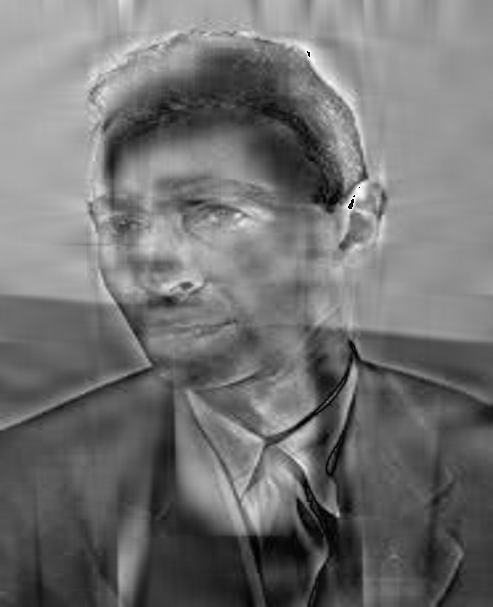

In [ ]:
img = PIL.Image.fromarray(twoDLowFreq.astype("uint8"), 'L')
display(img)
